In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Refunds that created services cases since 1-1-2020').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df= pd.DataFrame.from_records(rows)

In [2]:
colnames= df.loc[0].tolist()
df.drop(axis=0, index=0, inplace= True)
df.columns=colnames

In [3]:
df['dateentered']=pd.to_datetime(df.dateentered)

In [4]:
df.dtypes

EnteredByFirstName            object
enteredbylastname             object
dateentered           datetime64[ns]
jobtype                       object
MachineID                     object
siteid                        object
sitename                      object
RefundCase                    object
problemcode                   object
ServiceCase                   object
dtype: object

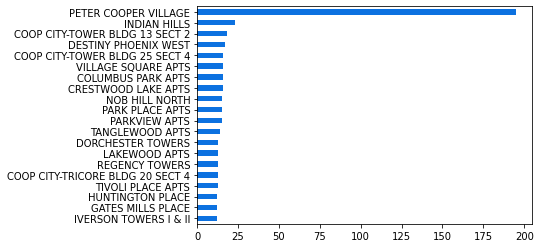

In [5]:
df.sitename.value_counts().sort_values().tail(20).plot(kind='barh', color= '#0C71E0')

In [6]:
sitelist= df.sitename.value_counts().sort_values().tail(20).index.tolist()

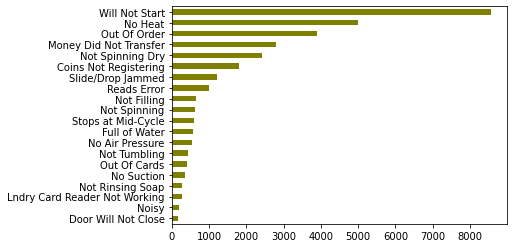

In [7]:
df.problemcode.value_counts().sort_values().tail(20).plot(kind='barh', color= 'olive')

In [8]:
problist= df.problemcode.value_counts().sort_values().tolist()

In [9]:
af= df.groupby(['sitename', 'problemcode']).size().sort_values(ascending= False).reset_index().\
rename(columns={0:'cnt_rfnd'})

In [13]:
df.groupby(['sitename', 'problemcode']).size().sort_values(ascending= False)

sitename                    problemcode           
PETER COOPER VILLAGE        No Heat                   64
                            Will Not Start            24
                            Out Of Order              21
                            Money Did Not Transfer    18
                            Not Tumbling              15
                                                      ..
NEW HAMPTON II CONDO        Not Spinning Dry           1
                            Out Of Order               1
NEW HAMPTON III CONDO       Full of Water              1
NEW HARTFORD SQUARE SENIOR  Not Filling                1
1 BEACH ST                  Will Not Start             1
Length: 29577, dtype: int64

In [14]:
df['month_yr']= df.dateentered.dt.strftime('%m-%Y')

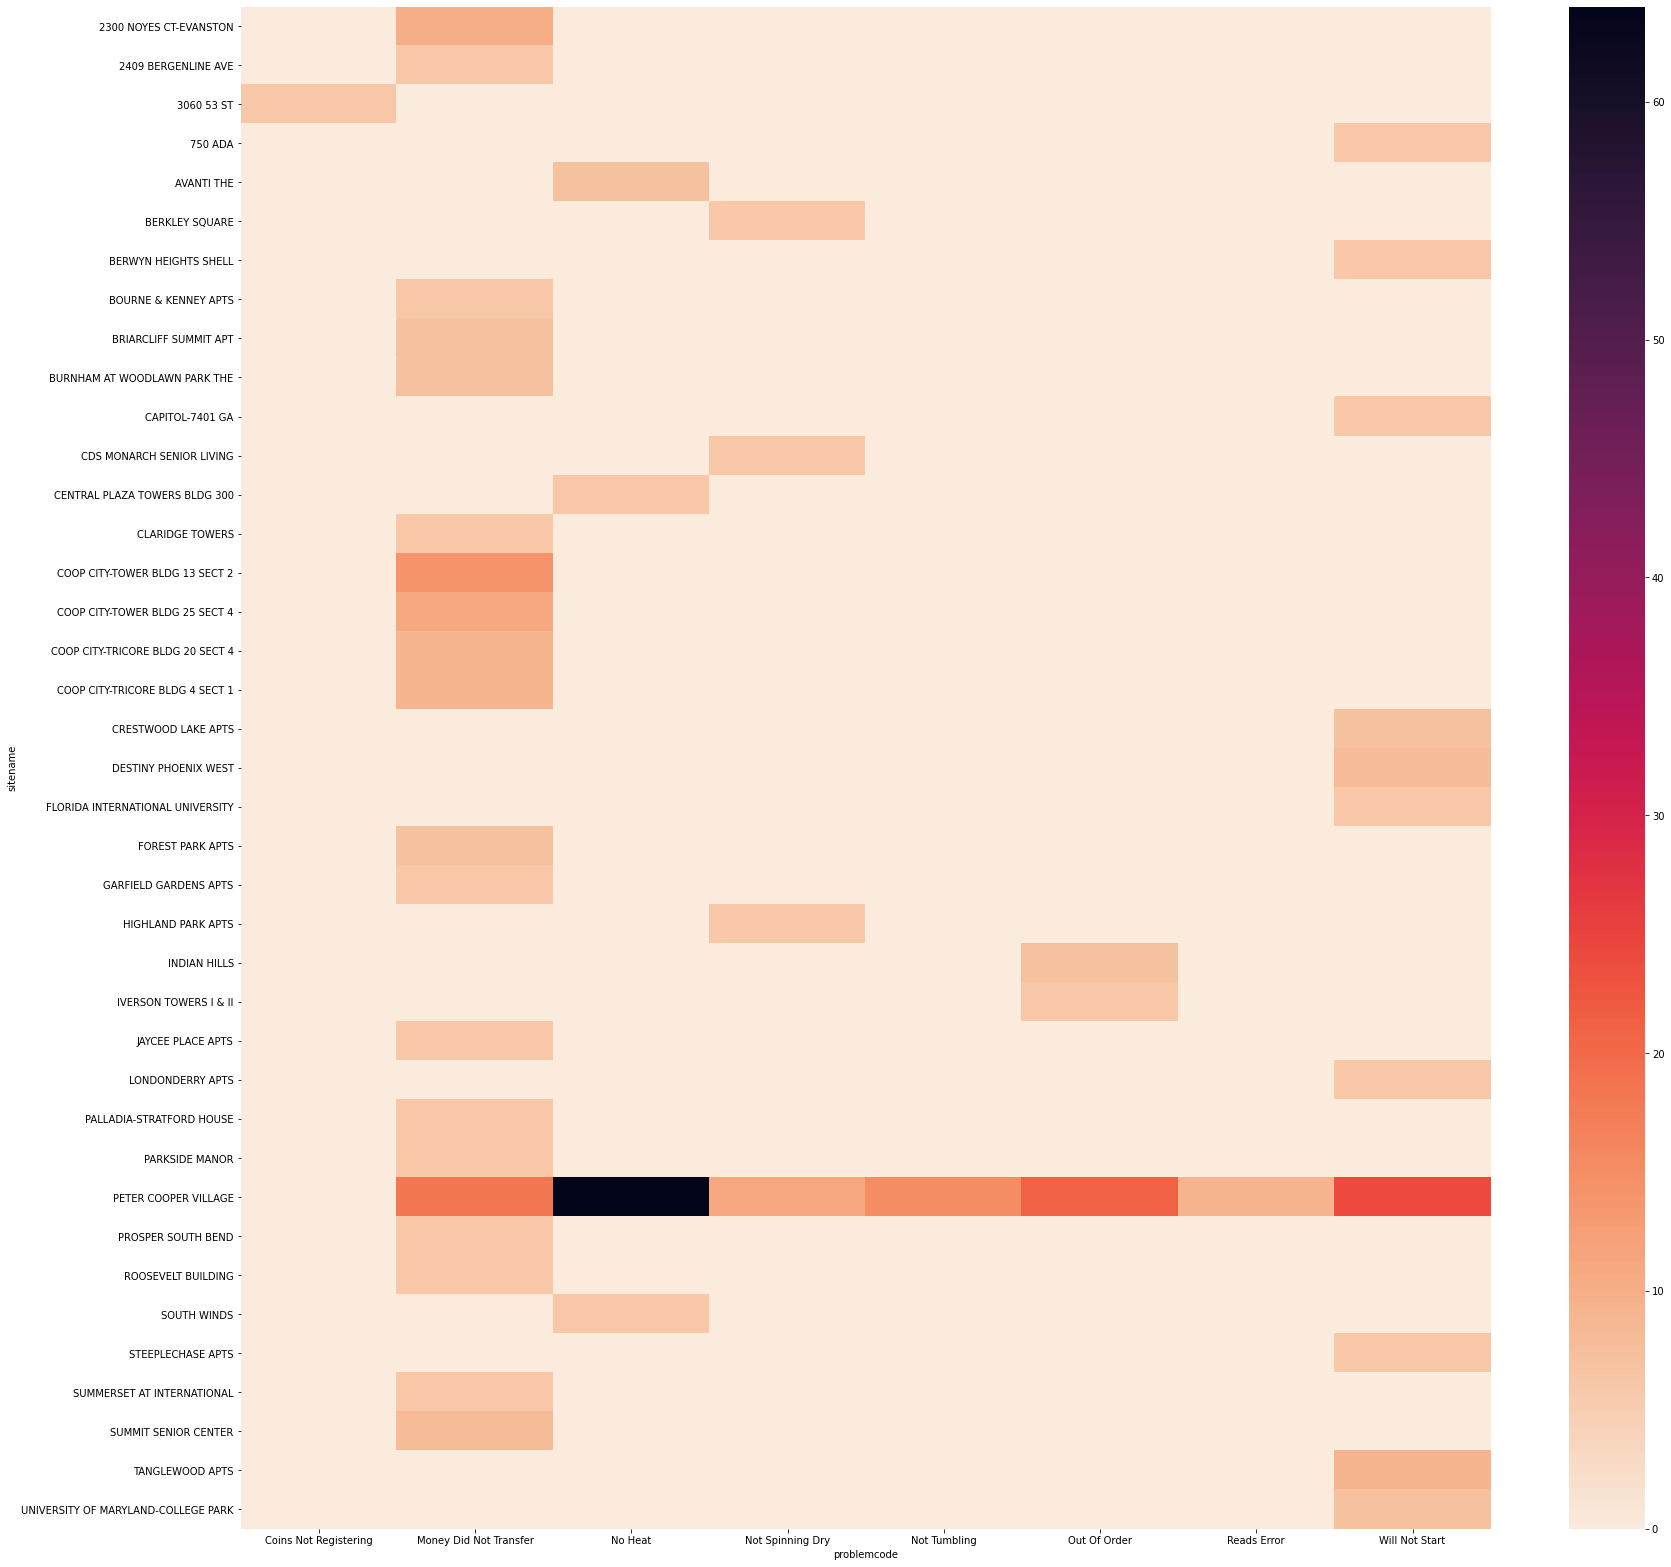

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(28,28))   
sns.heatmap(af.loc[af.cnt_rfnd > 5].pivot('sitename', 'problemcode', 'cnt_rfnd').fillna(0), cmap='rocket_r')

In [17]:
sites= af.head(10).sitename.unique()

In [18]:
sites

array(['PETER COOPER VILLAGE', 'COOP CITY-TOWER BLDG 13 SECT 2',
       'COOP CITY-TOWER BLDG 25 SECT 4', '2300 NOYES CT-EVANSTON',
       'TANGLEWOOD APTS'], dtype=object)

In [20]:
df.loc[df.sitename.isin(sites), 'siteid'].unique()

array(['M43353A50', 'M43353B10', 'M43353A36', 'M43353A20', 'M43353A39',
       'M43353A46', 'A38491', 'A94171', 'M43353B7', 'A83272', 'M43353A25',
       'M43353A49', 'M43353A57', 'M43353A7', 'A7801', 'M43353B18',
       'M43353A12', 'A38479', 'M43353A22', 'M43353B3', 'M43353A',
       'M43353A56', 'M43353A29', 'M43353A2', 'M43353B16', 'M32307',
       'M43353A55', 'M43353', 'M43353A11', 'M43353A3', 'M43353A58',
       'M43353A24', 'M43353B9', 'M43353A38', 'M43353A16', 'M43353A30',
       'M43353A44', 'M43353B17', 'M80711', 'M43353A47', 'M43353A32',
       'M43353B5', 'M43353B12', 'M43353B6', 'M43353A23', 'M43353B21',
       'M43353B13', 'M43353A8', 'M43353A4', 'M43353A17', 'M43353B4',
       'M43353A43', 'M43353B11', 'M43353A37', 'M43353B19', 'M43353A41',
       'M43353A54', 'M43353A33', 'M43353A18', 'M43353A40', 'M43353A15',
       'M43353A31', 'M43353A60', 'M43353B20', 'M43353A9', 'M43353A28',
       'M43353A52', 'A98480', 'M43353B14', 'S16471', 'M43353A14',
       'M43353A51', 'M43

In [ ]:
df.columns

Index(['EnteredByFirstName', 'enteredbylastname', 'dateentered', 'jobtype',
       'MachineID', 'siteid', 'sitename', 'RefundCase', 'problemcode',
       'ServiceCase', 'month_yr'],
      dtype='object')

In [ ]:
df.loc[df.sitename.isin(sites)].groupby('sitename')['dateentered'].agg(['min', 'max'])

,min,max
sitename,,
2300 NOYES CT-EVANSTON,2020-01-03 11:45:00,2020-04-17 11:37:00
COOP CITY-TOWER BLDG 13 SECT 2,2020-01-13 15:20:00,2020-04-13 16:56:00
COOP CITY-TOWER BLDG 25 SECT 4,2020-01-03 11:35:00,2020-03-17 19:47:00
PETER COOPER VILLAGE,2020-01-02 11:47:00,2020-04-21 11:58:00
TANGLEWOOD APTS,2020-01-06 08:33:00,2020-04-20 08:47:00
